In [1]:
from importlib import reload
import backtest
import order_book
import signal_1

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf

In [3]:
tickers = ['TSLA', 'GS']
colnames = []
for ticker in tickers:
    ts = yf.Ticker(ticker)
    data = ts.history(interval="1h", period="2y")["Close"]
    if len(colnames)==0:
        combined = data.copy()
    else:
        combined = pd.concat([combined, data.copy()], axis = 1)
    colnames.append(ticker)
    combined.columns = colnames

In [4]:
combined = combined.reset_index().rename(columns={'Datetime':'Date'})
combined

,Date,TSLA,GS
0,2022-05-18 09:30:00-04:00,250.619995,309.450012
1,2022-05-18 10:30:00-04:00,245.186661,308.750000
2,2022-05-18 11:30:00-04:00,238.429993,308.820007
3,2022-05-18 12:30:00-04:00,235.766663,309.089996
4,2022-05-18 13:30:00-04:00,235.646667,308.649994
...,...,...,...
3504,2024-05-17 11:30:00-04:00,179.255005,467.820007
3505,2024-05-17 12:30:00-04:00,177.220001,468.149994
3506,2024-05-17 13:30:00-04:00,176.170105,466.510010
3507,2024-05-17 14:30:00-04:00,177.120102,467.170013


In [5]:
df = combined


df1 = df[['Date', 'TSLA']]
df2 = df[['Date', 'GS']]
df1['Ticker'] = 'TSLA'
df2['Ticker'] = 'GS'

df_res = pd.concat([df1.rename(columns={'TSLA':'Price'}),df2.rename(columns={'GS':'Price'})])
#df1.drop('index', inplace=True)
#df_res.rename(columns={'Datetime':'Date'}, inplace=True)
df_res# = df1[['Date', 'Ticker']]

,Date,Price,Ticker
0,2022-05-18 09:30:00-04:00,250.619995,TSLA
1,2022-05-18 10:30:00-04:00,245.186661,TSLA
2,2022-05-18 11:30:00-04:00,238.429993,TSLA
3,2022-05-18 12:30:00-04:00,235.766663,TSLA
4,2022-05-18 13:30:00-04:00,235.646667,TSLA
...,...,...,...
3504,2024-05-17 11:30:00-04:00,467.820007,GS
3505,2024-05-17 12:30:00-04:00,468.149994,GS
3506,2024-05-17 13:30:00-04:00,466.510010,GS
3507,2024-05-17 14:30:00-04:00,467.170013,GS


In [6]:
df_res.iloc[100]["Date"]

Timestamp('2022-06-08 11:30:00-0400', tz='America/New_York')

In [7]:
BBO = order_book.Book()
BBO.addOrder(df_res.iloc[100]["Date"], "TSLA", 300.0, 10)
print(BBO.getTickerBook(["TSLA"]))
BBO.addOrder(df_res.iloc[150]["Date"], "GS", 250.0, -25)

                       Date Ticker  Quantity  CostBasis      MV  unrealizedPnl
0 2022-06-08 11:30:00-04:00   TSLA        10     3000.0  3000.0            0.0


In [8]:
df_res
BBO.get_books()

,Date,Ticker,Quantity,CostBasis,MV,unrealizedPnl
0,2022-06-08 11:30:00-04:00,TSLA,10,3000.0,3000.0,0.0
1,2022-06-17 12:30:00-04:00,GS,-25,-6250.0,-6250.0,0.0


In [9]:
BBO.backfillPnL(df_res)

In [10]:
hist = BBO.getHistoryDf()

In [11]:
BBO.getTickerBook(['TSLA'])

,Date,Ticker,Quantity,CostBasis,MV,unrealizedPnl
0,2022-06-08 11:30:00-04:00,TSLA,10,3000.0,3000.0,0.0


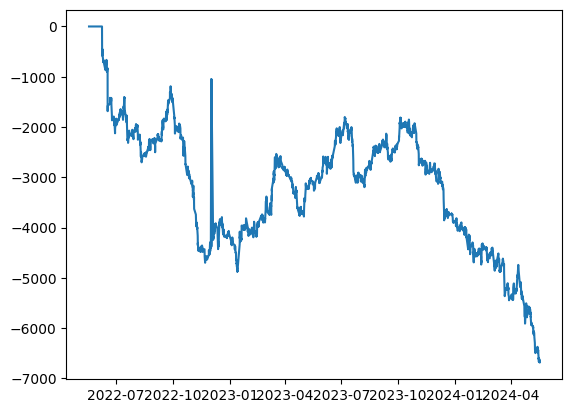

In [13]:
plt.plot(hist[['PnL']])
plt.show()

In [18]:
hist.iloc[90:105]

,CostBasis,Value,PnL
Date,,,
2022-06-06 15:30:00-04:00,0.0,0.000000,0.000000
2022-06-07 09:30:00-04:00,0.0,0.000000,0.000000
2022-06-07 10:30:00-04:00,0.0,0.000000,0.000000
2022-06-07 11:30:00-04:00,0.0,0.000000,0.000000
2022-06-07 12:30:00-04:00,0.0,0.000000,0.000000
2022-06-07 13:30:00-04:00,0.0,0.000000,0.000000
2022-06-07 14:30:00-04:00,0.0,0.000000,0.000000
2022-06-07 15:30:00-04:00,0.0,0.000000,0.000000
2022-06-08 09:30:00-04:00,0.0,0.000000,0.000000
